In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.cluster import KMeans
import time
from math import *
import re
import pandas as pd
import random as rd

In [2]:
!pip install scikit-learn-extra

In [3]:
signatures_path = './signatures/'

# Partie I - Classification des personnes par complexité moyenne




In [4]:
complexity_name_4G = 'complex_4G.txt'
complexity_path_4G = signatures_path + complexity_name_4G

In [5]:
complexity_avg_4G=[]
with open(complexity_path_4G,"r") as a:
    lignes_complexite=a.readlines()   
    for k in range(100):
        m=lignes_complexite[k].replace("\t", " ").split(' ')
        s=0
        for l in range(25):
            m[l] = m[l].replace(',', '.')
            s+=float(m[l])
        complexity_avg_4G.append(s/25)
#print(complexity_avg_4G)

In [6]:
complexity_name_8G = 'complex_8G.txt'
complexity_path_8G = signatures_path + complexity_name_8G

In [7]:
complexity_avg_8G=[]
with open(complexity_path_8G,"r") as b:
    lignes_complexite=b.readlines()   
    for k in range(100):
        m=lignes_complexite[k].replace("\t", " ").split(' ')
        s=0
        for l in range(25):
            m[l] = m[l].replace(',', '.')
            s+=float(m[l])
        complexity_avg_8G.append(s/25)
#print(complexity_avg_8G)

In [8]:
complexity_name_24G = 'complex_24G.txt'
complexity_path_24G = signatures_path + complexity_name_24G

In [9]:
complexity_avg_24G=[]
with open(complexity_path_24G,"r") as c:
    lignes_complexite=c.readlines()   
    for k in range(100):
        m=lignes_complexite[k].replace("\t", " ").split(' ')
        s=0
        for l in range(25):
            m[l] = m[l].replace(',', '.')
            s+=float(m[l])
        complexity_avg_24G.append(s/25)
#print(complexity_avg_24G)

In [10]:
complexity_avg_4G=np.array(complexity_avg_4G).reshape(-1, 1)
kmeans4G = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=200).fit(complexity_avg_4G)

complexity_avg_8G=np.array(complexity_avg_8G).reshape(-1, 1)
kmeans8G = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=200).fit(complexity_avg_8G)

complexity_avg_24G=np.array(complexity_avg_24G).reshape(-1, 1)
kmeans24G = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=200).fit(complexity_avg_24G)

[27.81165238904024, 31.386732985756304, 29.76311769369775]
[27.880914554009642, 22.687008885135963, 30.010458477007393]
[26.796095466939253, 11.65548049477418, 23.016404444598123]


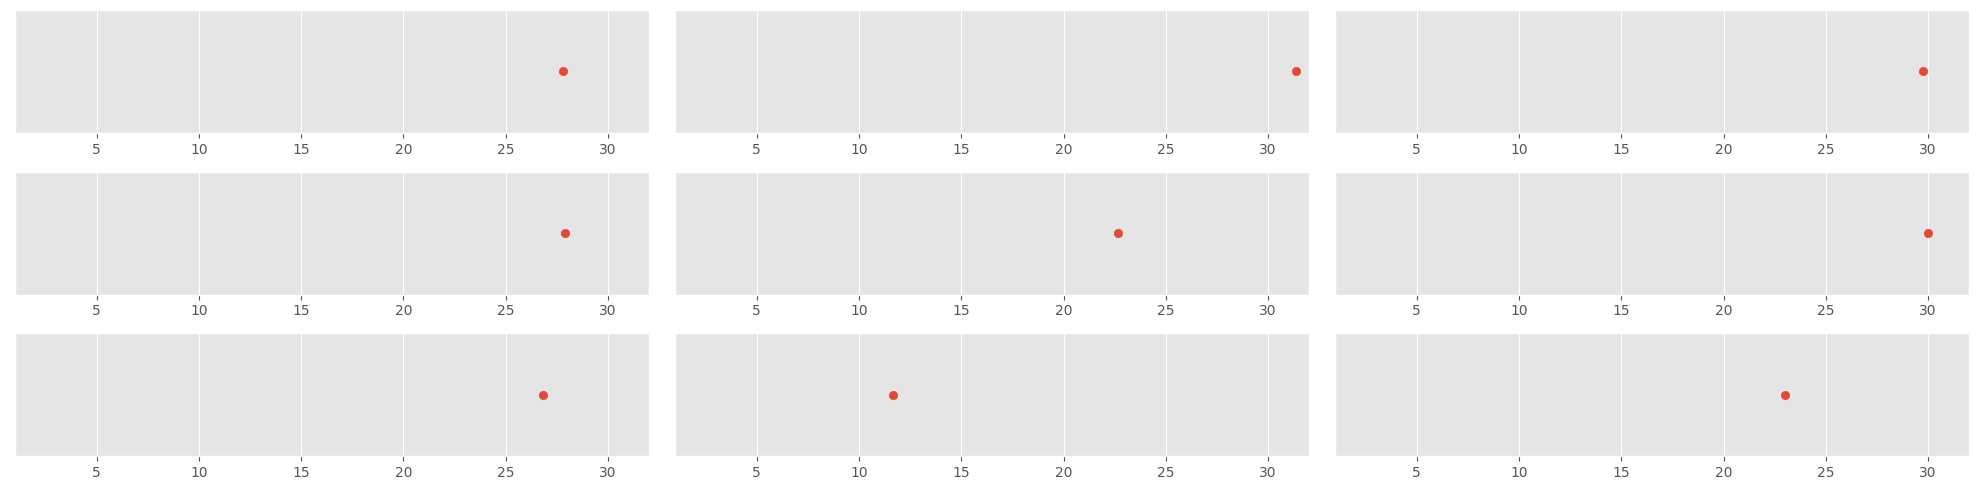

In [11]:
centroids4G,centroids8G,centroids24G=[[0,0,0],[0,0,0],[0,0,0]]
for i in range(3):
  centroids4G[i]=kmeans4G.cluster_centers_[i][0]
  centroids8G[i]=kmeans8G.cluster_centers_[i][0]
  centroids24G[i]=kmeans24G.cluster_centers_[i][0]

print(centroids4G)
print(centroids8G)
print(centroids24G)
centroids = centroids4G + centroids8G + centroids24G

plt.figure(figsize=(20,5))
for i in range(len(centroids)):
    figure = plt.subplot(3,3,i+1)
    figure.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.xlim(1,32)
    plt.scatter(centroids[i],np.zeros_like(centroids[i]))
    plt.title("")

In [12]:
def attribution_complexite(centroids4G):
    m = max(centroids4G)
    n = min(centroids4G)
    a = [i for i, j in enumerate(centroids4G) if j == m]
    b = [i for i, j in enumerate(centroids4G) if j == n]
    if a[0] != 0 and b[0] != 0:
        c=[0]
    if a[0] != 1 and b[0] != 1:
        c=[1]
    if a[0] != 2 and b[0] != 2:
        c=[2]
    return a,c,b

In [13]:
def clustering_par_complexite(centroids4G,kmeansxlabels_):
    Forte=[]
    Moyenne=[]
    Faible=[]
    for i in range(len(kmeansxlabels_)):
        if kmeansxlabels_[i] == attribution_complexite(centroids4G)[0][0]:
            Forte.append(i+1)
        if kmeansxlabels_[i] == attribution_complexite(centroids4G)[1][0]:
            Moyenne.append(i+1)
        if kmeansxlabels_[i] == attribution_complexite(centroids4G)[2][0]:
            Faible.append(i+1)
    #print('Numéros des personnes dont les signatures sont à fortes complexités :',Forte)
    #print('Numéros des personnes dont les signatures sont à moyennes complexités :',Moyenne)
    #print('Numéros des personnes dont les signatures sont à faibles complexités :',Faible)
    return Forte, Moyenne, Faible

Pourcentage de forte complexité avec  4 G : 42 %
Pourcentage de moyenne complexité avec  4 G : 40 %
Pourcentage de faible complexité avec  4 G : 18 %
Pourcentage de forte complexité avec  8 G : 40 %
Pourcentage de moyenne complexité avec  8 G : 52 %
Pourcentage de faible complexité avec  8 G : 8 %
Pourcentage de forte complexité avec  24 G : 49 %
Pourcentage de moyenne complexité avec  24 G : 44 %
Pourcentage de faible complexité avec  24 G : 7 %


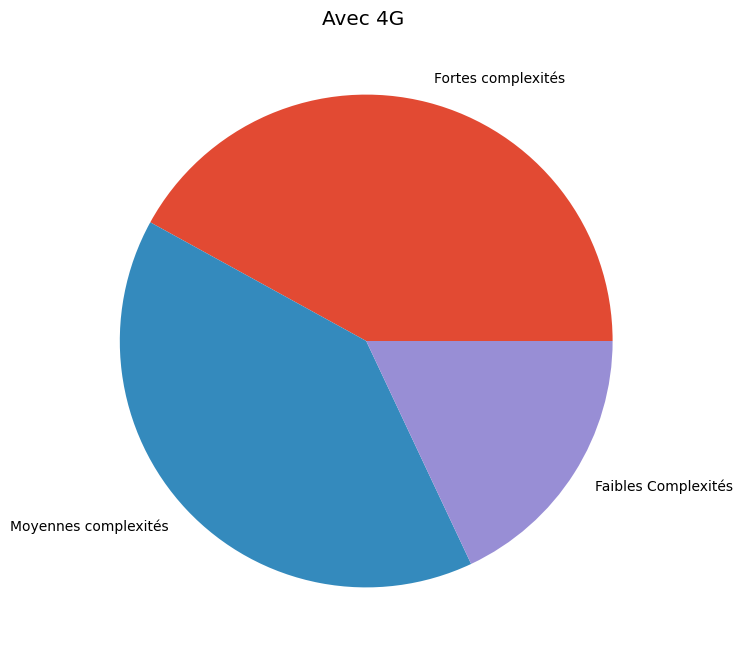

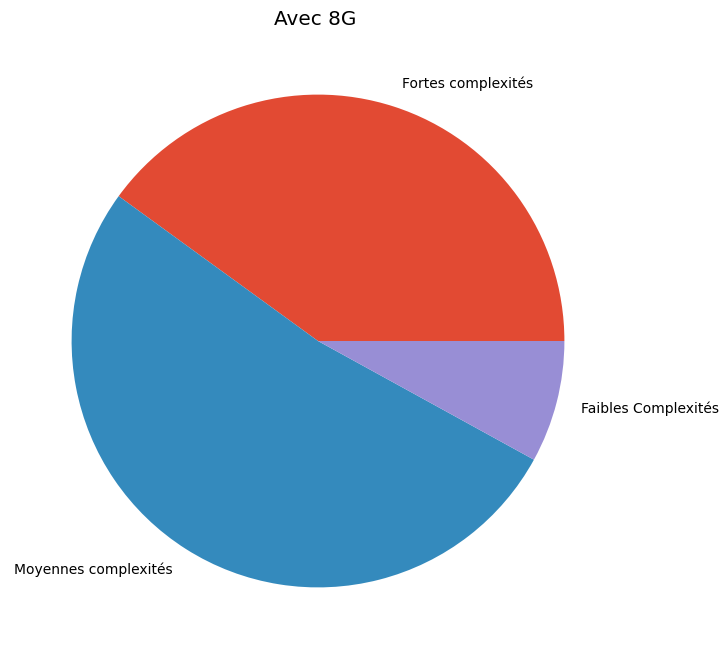

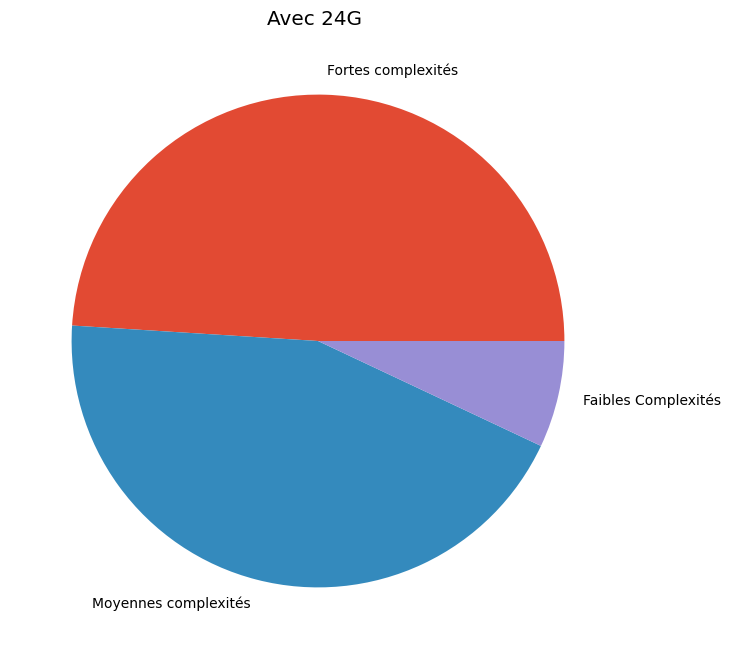

<Figure size 800x800 with 0 Axes>

In [14]:
S=[centroids4G,kmeans4G.labels_,centroids8G,kmeans8G.labels_,centroids24G,kmeans24G.labels_]
def f(x):
    return (x**2*3/2-x+4)

plt.figure(figsize=(18,8))
for i in range(0,6,2):
    X,Y,Z=clustering_par_complexite(S[i],S[i+1])
    print('Pourcentage de forte complexité avec ',int(f(i)),'G :', len(X),'%')
    print('Pourcentage de moyenne complexité avec ',int(f(i)),'G :', len(Y),'%')
    print('Pourcentage de faible complexité avec ',int(f(i)),'G :', len(Z),'%')
    plt.pie([len(X),len(Y),len(Z)], labels = ['Fortes complexités', 'Moyennes complexités', 'Faibles Complexités']) 
    plt.title('Avec {}G '.format(int(f(i))))
    plt.figure(figsize = (8, 8))

In [15]:
#The final value of the inertia criterion (sum of squared distances to the closest centroid 
#for all observations in the training set).
print(kmeans4G.inertia_)
print(kmeans8G.inertia_)
print(kmeans24G.inertia_)

30.081946111658404
50.84820550342413
183.03997120592155


In [16]:
def dist(p,q):
  return sqrt(sum((px - qx) ** 2.0 for px, qx in zip(p, q)))

In [17]:
from sklearn_extra.cluster import KMedoids
kmedoids4G = KMedoids(n_clusters=3, init='heuristic').fit(complexity_avg_4G)
kmedoids8G = KMedoids(n_clusters=3, init='heuristic').fit(complexity_avg_8G)
kmedoids24G = KMedoids(n_clusters=3, init='heuristic').fit(complexity_avg_24G)

[28.463889590774983, 30.22229146143609, 31.771205125737072]
[29.879268759259276, 28.231331430980152, 26.361725879571498]
[24.10215774312046, 26.89118134417965, 19.047779077533434]


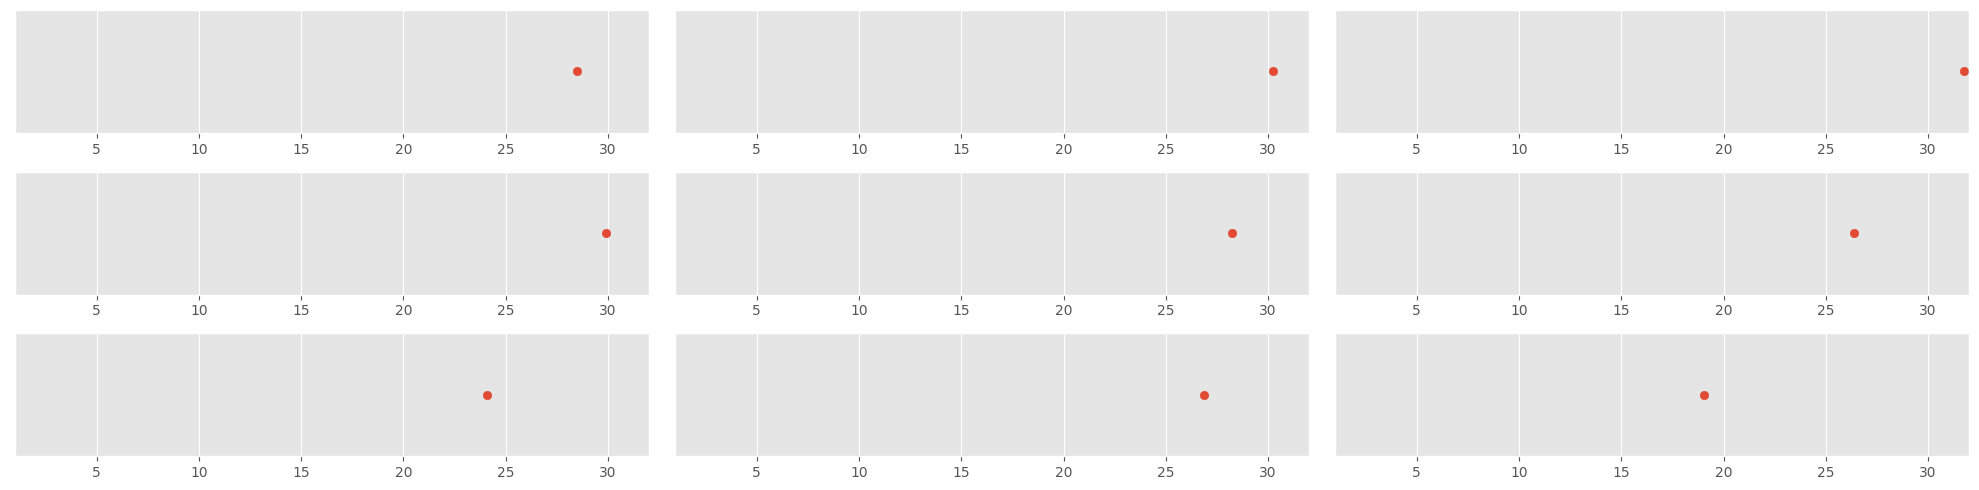

In [18]:
centroids_kmedoids4G,centroids_kmedoids8G,centroids_kmedoids24G=[[0,0,0],[0,0,0],[0,0,0]]
for i in range(3):
  centroids_kmedoids4G[i]=kmedoids4G.cluster_centers_[i][0]
  centroids_kmedoids8G[i]=kmedoids8G.cluster_centers_[i][0]
  centroids_kmedoids24G[i]=kmedoids24G.cluster_centers_[i][0]

print(centroids_kmedoids4G)
print(centroids_kmedoids8G)
print(centroids_kmedoids24G)

centroids_kmedoids = centroids_kmedoids4G + centroids_kmedoids8G + centroids_kmedoids24G

plt.figure(figsize=(20,5))
for i in range(len(centroids_kmedoids)):
  figure = plt.subplot(3,3,i+1)
  figure.axes.get_yaxis().set_visible(False)
  plt.tight_layout()
  plt.xlim(1,32)
  plt.scatter(centroids_kmedoids[i],np.zeros_like(centroids_kmedoids[i]))
  plt.title("")

Pourcentage de forte complexité avec  4 G : 27 %
Pourcentage de moyenne complexité avec  4 G : 47 %
Pourcentage de faible complexité avec  4 G : 26 %
Pourcentage de forte complexité avec  8 G : 40 %
Pourcentage de moyenne complexité avec  8 G : 41 %
Pourcentage de faible complexité avec  8 G : 19 %
Pourcentage de forte complexité avec  24 G : 44 %
Pourcentage de moyenne complexité avec  24 G : 42 %
Pourcentage de faible complexité avec  24 G : 14 %


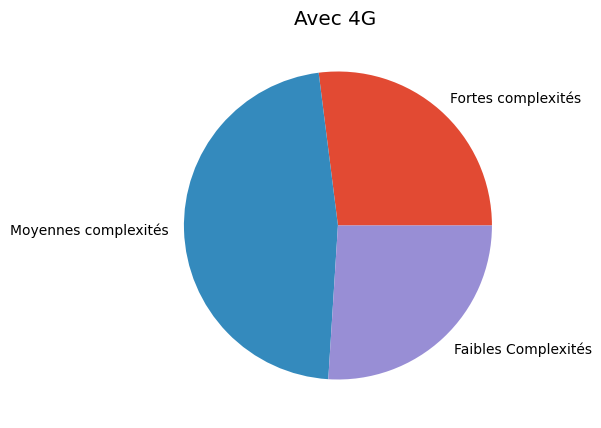

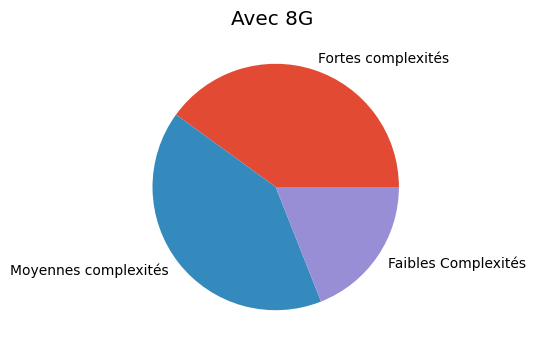

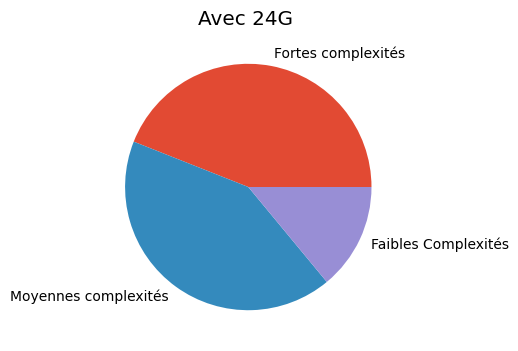

<Figure size 400x400 with 0 Axes>

In [19]:
T=[centroids_kmedoids4G,kmedoids4G.labels_,centroids_kmedoids8G,kmedoids8G.labels_,centroids_kmedoids24G,kmedoids24G.labels_]

plt.figure(figsize=(20,5))
for i in range(0,6,2):
    X,Y,Z=clustering_par_complexite(T[i],T[i+1])
    print('Pourcentage de forte complexité avec ',int(f(i)),'G :', len(X),'%')
    print('Pourcentage de moyenne complexité avec ',int(f(i)),'G :', len(Y),'%')
    print('Pourcentage de faible complexité avec ',int(f(i)),'G :', len(Z),'%')
    plt.pie([len(X),len(Y),len(Z)], labels = ['Fortes complexités', 'Moyennes complexités', 'Faibles Complexités']) 
    plt.title('Avec {}G '.format(int(f(i))))
    plt.figure(figsize = (4, 4))

In [20]:
print(kmedoids4G.inertia_)
print(kmedoids8G.inertia_)
print(kmedoids24G.inertia_)

47.12588573431133
69.83392409336349
122.26229695952962


In [21]:
BDD_path = 'bdd/'
visu_signatures_path = signatures_path + BDD_path
def plot_signature(i,j):
    m = [visu_signatures_path]+[i]+["v"]+[j]+[".txt"]
    n = ' '.join([str(elem) for elem in m ])
    with open(re.sub(r"\s+", "", n),"r") as a:
        lines=a.readlines()
        h=[]
        for k in range(len(lines)):
            h.append(lines[k].split())
            for j in range(5):
                h[k][j]=int(h[k][j])
        x=[h[l][0] for l in range(len(h))]
        y=[h[l][1] for l in range(len(h))]
        plt.figure(figsize=(8,8))
        plt.plot(x,y)
        plt.show()

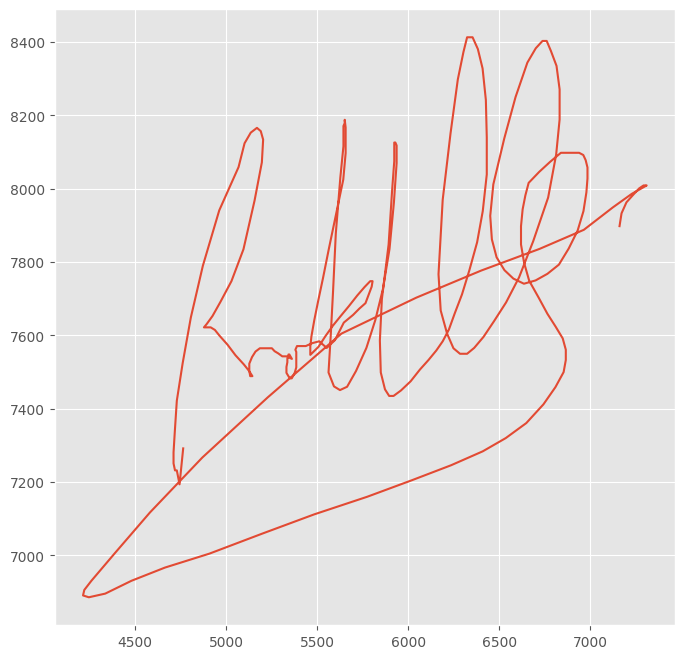

In [22]:
plot_signature(3,5)

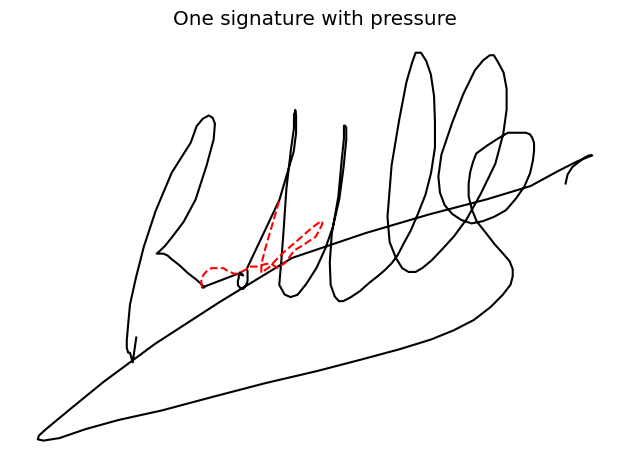

In [23]:
#autre façon + simple de visualiser
BDD_path = 'bdd/'
visu_signatures_path = signatures_path + BDD_path
def plot_signature(person_id,sign_num,pressure=False,dashes=False):
    full_path = visu_signatures_path + str(person_id)+"v"+str(sign_num)+".txt"
    signature = pd.read_csv(full_path,sep=" ", names=["x","y","pressure","azimut","altitude"])
    plt.axis("off")
    plt.tight_layout()
    if pressure:
        colors = list(round(signature["pressure"]/255.,2))
        plt.scatter(signature["x"],signature["y"],c=colors)
        plt.plot(signature["x"],signature["y"],color='black')
    elif dashes:
        nzero_pressure = signature[signature["pressure"]!=0]
        zero_pressure = signature[signature["pressure"] == 0]
        plt.plot(nzero_pressure["x"],nzero_pressure["y"],color='black')
        plt.plot(zero_pressure["x"],zero_pressure["y"], color="r", linestyle="dashed")
    else:
        plt.plot(signature["x"],signature["y"],color='black')

plt.title("One signature with pressure")
plot_signature(3,5,pressure=False,dashes=True)

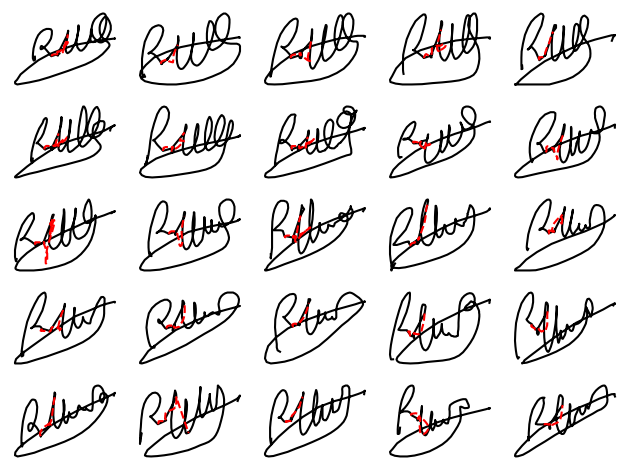

In [24]:
#visualiser plusieurs signatures
person_id = 3
N_signatures = 25
for i in range(N_signatures):
  plt.subplot(5,5,i+1)
  plot_signature(person_id,i,False,True)


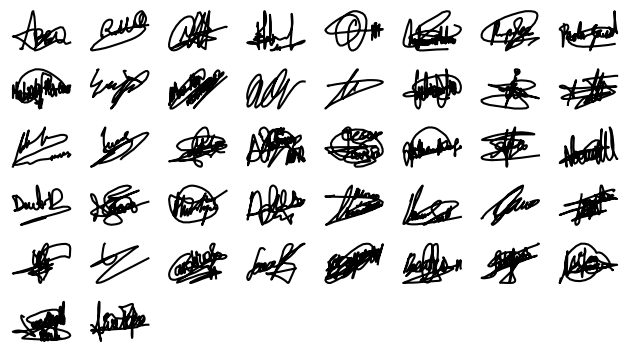

In [25]:
for i in range(len(clustering_par_complexite(centroids4G,kmeans4G.labels_)[0])):
  plt.subplot(8,8,i+1)
  plot_signature(clustering_par_complexite(centroids4G,kmeans4G.labels_)[0][i],0)

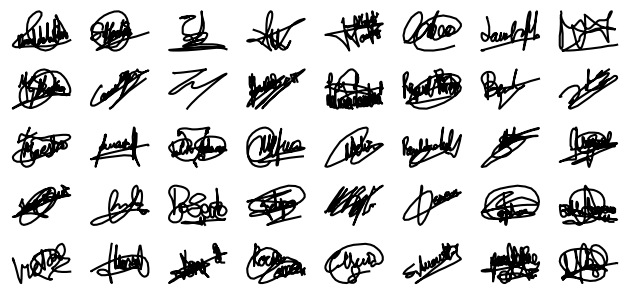

In [26]:
for i in range(len(clustering_par_complexite(centroids4G,kmeans4G.labels_)[1])):
  plt.subplot(8,8,i+1)
  plot_signature(clustering_par_complexite(centroids4G,kmeans4G.labels_)[1][i],0)

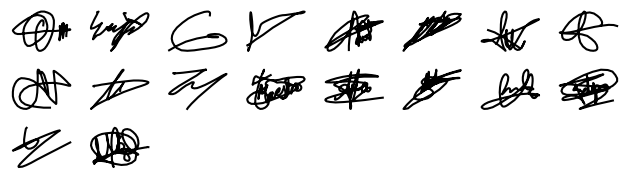

In [27]:
for i in range(len(clustering_par_complexite(centroids4G,kmeans4G.labels_)[2])):
  plt.subplot(8,8,i+1)
  plot_signature(clustering_par_complexite(centroids4G,kmeans4G.labels_)[2][i]-1,0)

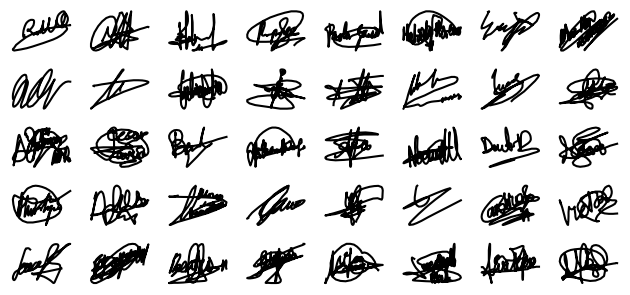

In [28]:
for i in range(len(clustering_par_complexite(centroids8G,kmeans8G.labels_)[0])):
  plt.subplot(8,8,i+1)
  plot_signature(clustering_par_complexite(centroids8G,kmeans8G.labels_)[0][i],0)

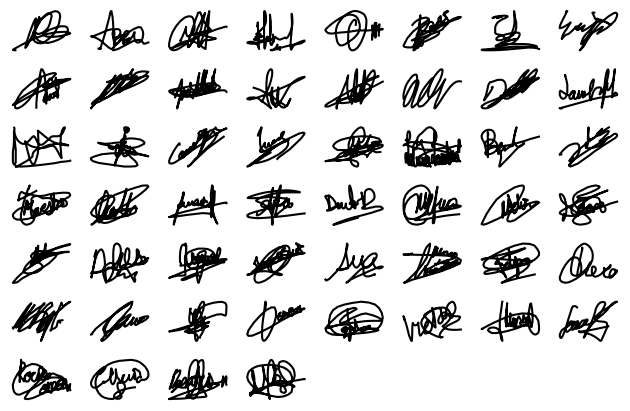

In [29]:
for i in range(len(clustering_par_complexite(centroids8G,kmeans8G.labels_)[1])):
  plt.subplot(8,8,i+1)
  plot_signature(clustering_par_complexite(centroids8G,kmeans8G.labels_)[1][i]-1,0)

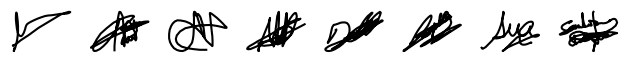

In [30]:
for i in range(len(clustering_par_complexite(centroids8G,kmeans8G.labels_)[2])):
  plt.subplot(8,8,i+1)
  plot_signature(clustering_par_complexite(centroids8G,kmeans8G.labels_)[2][i],0)

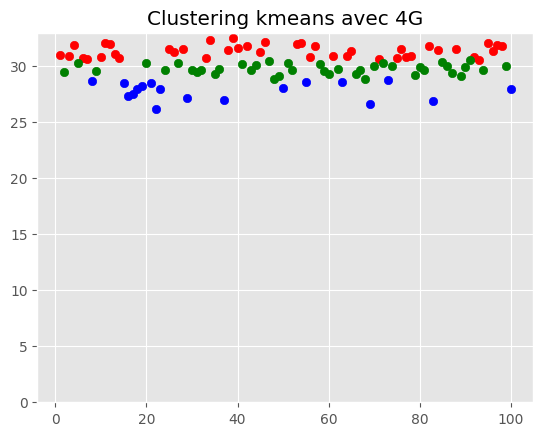

In [31]:
colors = ["r", "g", "b"]
for k in range(3):
    x=clustering_par_complexite(centroids4G,kmeans4G.labels_)[k]
    y=[]
    for i in range(len(x)):
        y.append(complexity_avg_4G[x[i]-1][0])
    plt.scatter(x, y, c=colors[k])
    plt.ylim(0,33)
    plt.title('Clustering kmeans avec 4G')

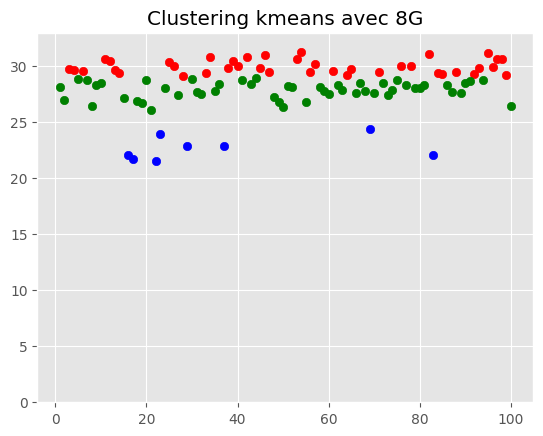

In [32]:
for k in range(3):
    x=clustering_par_complexite(centroids8G,kmeans8G.labels_)[k]
    y=[]
    for i in range(len(x)):
        y.append(complexity_avg_8G[x[i]-1][0])
    plt.scatter(x, y, c=colors[k])
    plt.ylim(0,33)
    plt.title('Clustering kmeans avec 8G')

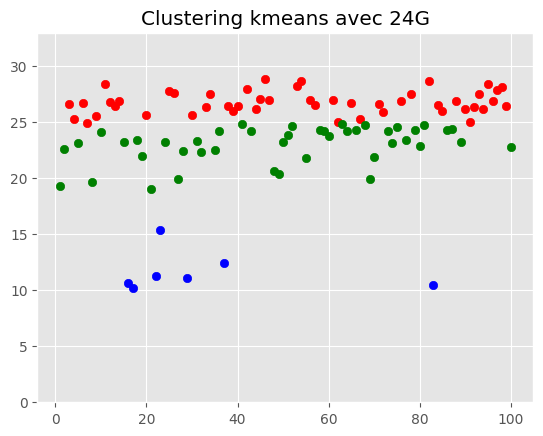

In [33]:
for k in range(3):
    x=clustering_par_complexite(centroids24G,kmeans24G.labels_)[k]
    y=[]
    for i in range(len(x)):
        y.append(complexity_avg_24G[x[i]-1][0])
    plt.scatter(x, y, c=colors[k])
    plt.ylim(0,33)
    plt.title('Clustering kmeans avec 24G')

In [34]:
def inertie_inter_cluster(centroids4G):       
    return dist([max(centroids4G)], [min(centroids4G)])/2

In [35]:
print(inertie_inter_cluster(centroids4G))
print(inertie_inter_cluster(centroids8G))
print(inertie_inter_cluster(centroids24G))
print(inertie_inter_cluster(centroids_kmedoids4G))
print(inertie_inter_cluster(centroids_kmedoids8G))
print(inertie_inter_cluster(centroids_kmedoids24G))

1.7875402983580315
3.661724795935715
7.570307486082537
1.6536577674810449
1.7587714398438887
3.9217011333231078


# Partie II - Classification des signatures

In [36]:
complexity_name = 'complex_24G.txt'
complexity_path = signatures_path + complexity_name

In [37]:
person_complexities = []
with open(complexity_path,'r') as f:
    for line in f.readlines():
      person_complexities.append(line.replace('\n','').split('\t'))


In [38]:
all_complexities = []
for cplx in person_complexities:
  for c in cplx:
    all_complexities.append(float(c))

complexities = np.array(all_complexities).reshape(-1,1)

In [39]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)

In [40]:
model.fit(complexities)

C:\Users\utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [41]:
model.predict(np.array(person_complexities[0]).reshape(-1,1))

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_7964\208050319.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  average_complexity.append(np.mean(np.array(complexities).astype(np.float)))
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_7964\208050319.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  average_complexity.append(np

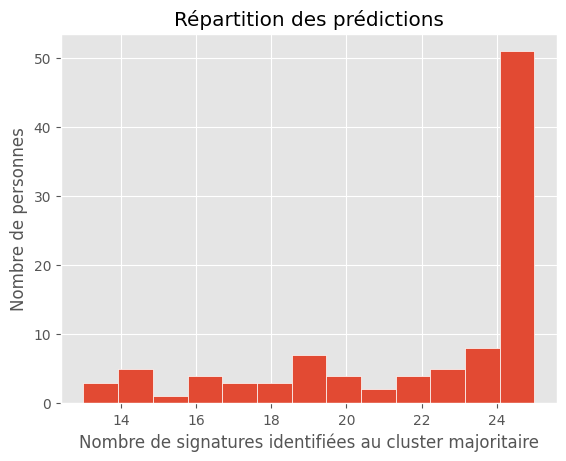

In [42]:
person_complexities.sort()
def right_prediction(model, person_complexities):
    average_complexity = []
    bincounts = []
    hist = []
    three_clusters = []
    two_clusters = []
    one_cluster = []
    for complexities in person_complexities:
        predictions = model.predict(np.array(complexities).reshape(-1,1))
        average_complexity.append(np.mean(np.array(complexities).astype(np.float)))
        person_predictions = np.bincount(predictions,minlength=3)
        bincounts.append(list(person_predictions))
    for i in range(len(bincounts)):
        count = bincounts[i]
        hist.append(max(count))
    plt.hist(x=hist,bins=13,edgecolor='white')
    plt.title('Répartition des prédictions')
    plt.xlabel('Nombre de signatures identifiées au cluster majoritaire')
    plt.ylabel('Nombre de personnes')
    return bincounts, average_complexity
  
bincounts, avg_complexities = right_prediction(model,person_complexities)

In [43]:
avg_count = {}
for i in range(len(avg_complexities)):
  count = bincounts[i]
  wrong_class = 25 - max(bincounts[i])
  if wrong_class > 0:
    if wrong_class in avg_count:
      avg_count[wrong_class].append(avg_complexities[i])
    else:
      avg_count[wrong_class] = [avg_complexities[i]]


avg_means = {k: np.mean(v) for k, v in avg_count.items()}

In [44]:
avg_means

{1: 21.267681473073832,
 7: 21.201894201410965,
 6: 23.602923028187003,
 5: 22.84570981435854,
 11: 24.322697193084053,
 2: 22.40604661464391,
 3: 24.63603224877494,
 12: 24.279173676825113,
 4: 23.933106358357097,
 9: 24.43923192552872,
 8: 24.347284752386145,
 10: 24.326353306652976}

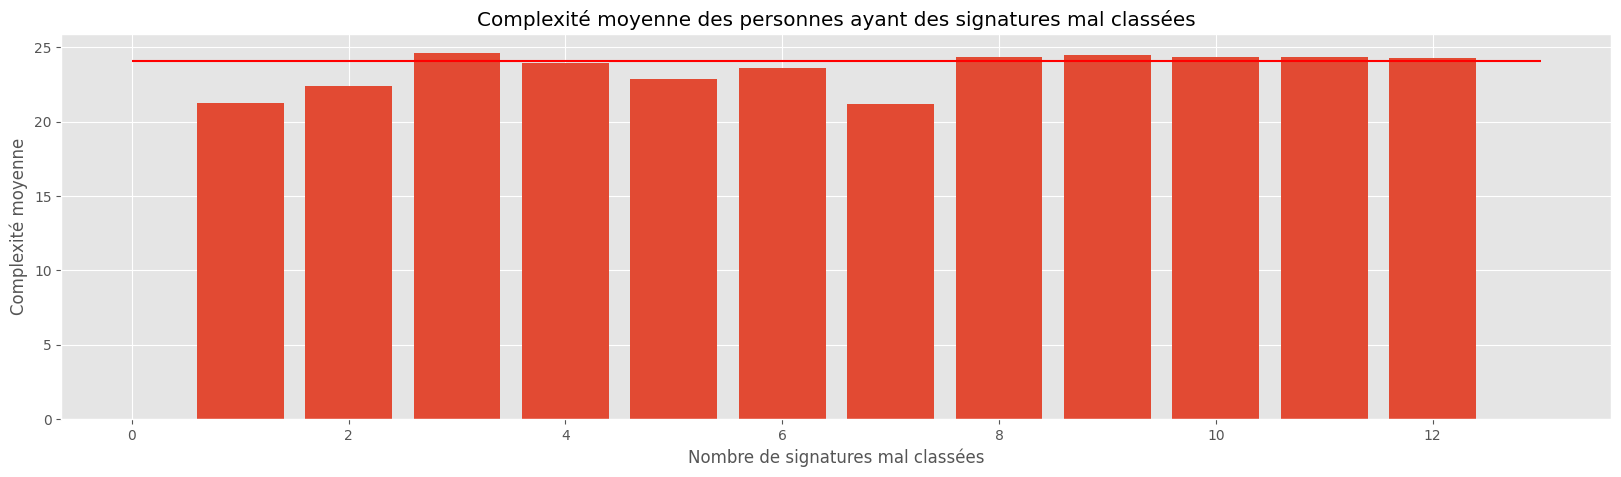

In [45]:
plt.figure(figsize=(20,5))
plt.bar(avg_means.keys(),avg_means.values())
plt.title("Complexité moyenne des personnes ayant des signatures mal classées")
plt.xlabel("Nombre de signatures mal classées")
plt.ylabel("Complexité moyenne")
plt.hlines(np.mean(complexities),xmin=0,xmax=13, colors='red', label="Complexité moyenne de toutes les personnes")

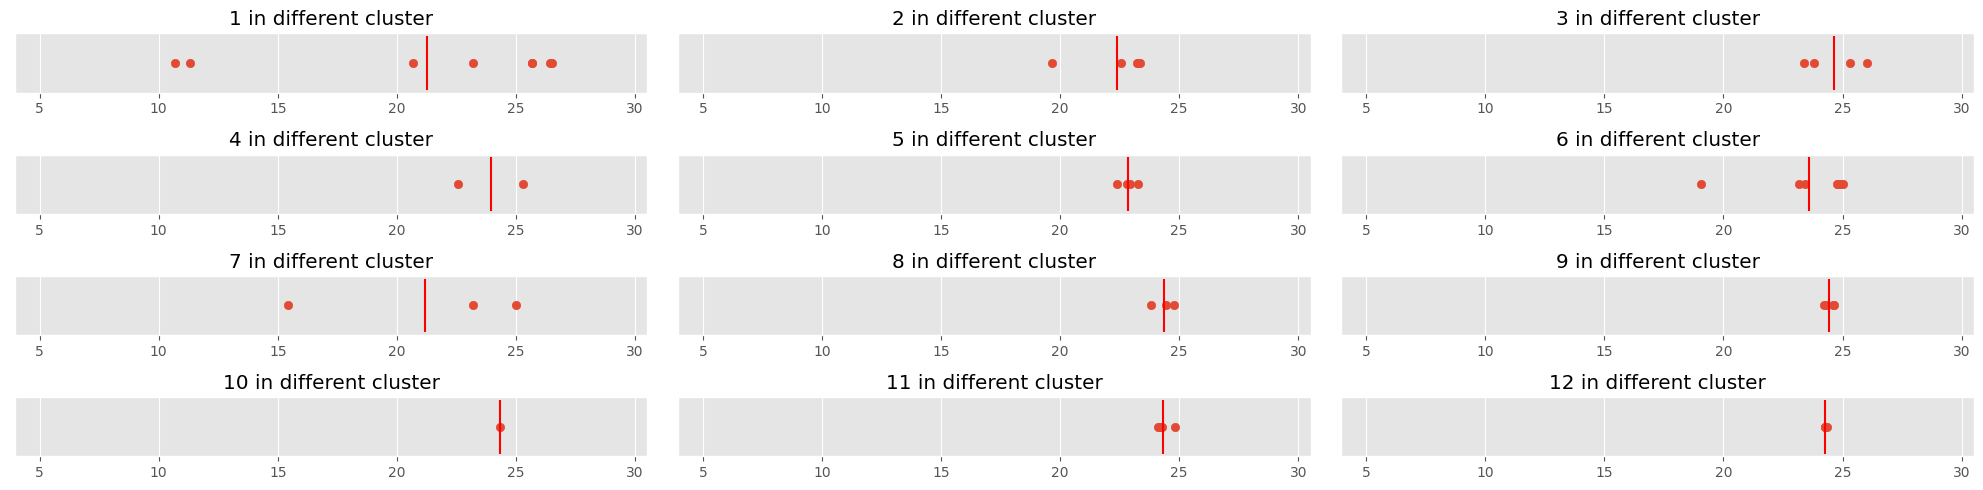

In [46]:
xmax = np.max(complexities)
xmin = np.min(complexities)

plt.figure(figsize=(20,5))
for i in avg_count.keys():
  figure = plt.subplot(4,3,i)
  figure.axes.get_yaxis().set_visible(False)
  plt.tight_layout()
  plt.xlim(xmin,xmax)
  plt.scatter(avg_count[i],np.zeros_like(avg_count[i]))
  plt.vlines(np.mean(avg_count[i]),-0.05,0.05,color="red")
  plt.title("{} in different cluster".format(i))

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_7964\4259169421.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10,10,i+1)


Text(0.5, 0.98, 'Signatures Cluster Repartition by person')

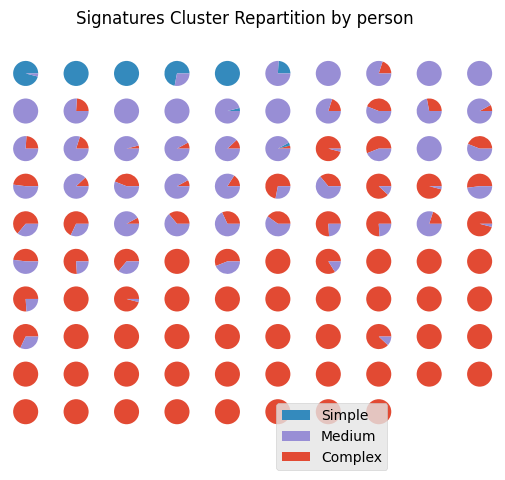

In [47]:
#visualiser plusieurs signatures
person_id = 3
N_persons = 100
plt.legend(["Simple","Medium","Complex"])

for i in range(N_persons-2):
  plt.subplot(10,10,i+1)
  patches, texts = plt.pie(bincounts[i])
plt.legend([patches[1],patches[2],patches[0]], ["Simple","Medium","Complex"])
plt.suptitle("Signatures Cluster Repartition by person") 

**Classification** des personnes par leur 25 signatures

In [48]:
import random
converted_complexities = []
#conversion en float
for complexity in person_complexities:
  random.shuffle(complexity)
  temp = []
  for c in complexity:
    temp.append(float(c))
  converted_complexities.append(temp)
len(converted_complexities)

100

In [49]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)


In [50]:
model.fit(converted_complexities)

C:\Users\utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [51]:
model.cluster_centers_

array([[11.88015893,  9.64291127, 11.92856038, 11.37605684, 10.28434074,
        11.11976439, 11.06801574, 12.9470556 , 11.52077135, 10.32163338,
        12.64644255, 11.60872317, 11.55963783, 12.17249335, 11.1535116 ,
        13.62014628, 11.85461754, 12.61284582, 12.25957357, 11.42271089,
        11.2430479 , 12.10055895, 10.91149586, 11.27949652, 12.85244194],
       [23.11094782, 23.22228596, 22.92152064, 22.95818929, 23.13043131,
        23.02973261, 23.02051717, 22.75228867, 22.89223617, 22.74033504,
        22.9485373 , 23.20666436, 23.19783158, 23.15254669, 23.08526331,
        22.70486423, 22.96215261, 23.03268312, 22.93254723, 23.27804379,
        23.23426131, 22.77196348, 22.90193983, 23.01017236, 23.21215523],
       [26.76045492, 26.82995383, 26.85847768, 26.79126089, 26.70609545,
        26.9305315 , 26.81322726, 26.72076453, 26.78761379, 26.79397873,
        26.69784786, 26.92149331, 26.81955837, 27.00086616, 26.58167007,
        26.71647731, 26.82359849, 26.67253295, 26

In [52]:
model.cluster_centers_[0]

array([11.88015893,  9.64291127, 11.92856038, 11.37605684, 10.28434074,
       11.11976439, 11.06801574, 12.9470556 , 11.52077135, 10.32163338,
       12.64644255, 11.60872317, 11.55963783, 12.17249335, 11.1535116 ,
       13.62014628, 11.85461754, 12.61284582, 12.25957357, 11.42271089,
       11.2430479 , 12.10055895, 10.91149586, 11.27949652, 12.85244194])

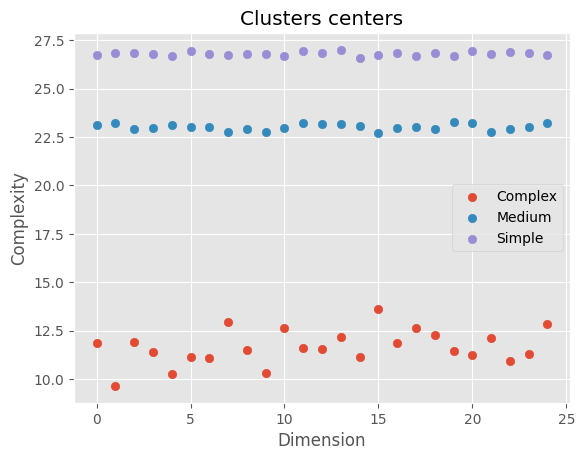

In [53]:
for center in model.cluster_centers_:
  plt.scatter(x=[i for i in range(len(center))],y=center)
  
plt.legend(["Complex","Medium","Simple"])
plt.title("Clusters centers")
plt.ylabel("Complexity")
plt.xlabel("Dimension")
plt.show()

# Partie 3 - Apprentissage et Généralisation

In [54]:
complexity_name = 'complex_24G.txt'
complexity_path = signatures_path + complexity_name

In [56]:
list_complexities2 = complexity
random.shuffle(list_complexities2)
complexities_kmeans = np.array(list_complexities2[:1250]).reshape(-1, 1) 
complexities_knn = np.array(list_complexities2[1250:]).reshape(-1, 1) 

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(complexities_kmeans)
pred_clusters_kmeans = kmeans.fit_predict(complexities_kmeans)
pred_clusters_kmeans

NameError: name 'mesure_complexite' is not defined

In [ ]:
def cluster_complexities_knn():

    result = np.zeros(2500)
    result_theory = np.zeros(2500)
    centers = [kmeans.cluster_centers_[0],
               kmeans.cluster_centers_[1],
               kmeans.cluster_centers_[2]]
    
    for i in range(1250):
        index = list_complexities.index(list_complexities2[i])
        result[index] = pred_clusters_kmeans[i]
        result_theory[index] = pred_clusters_kmeans[i]+1
    for i in range(1250):
        current = complexities_knn[i]
        index = list_complexities.index(complexities_knn[i])
        distances = [abs(current-centers[0]),
                         abs(current-centers[1]),
                         abs(current-centers[2])]
        result[index] = distances.index(min(distances))
    
    result_100 = np.zeros(100)
    for i in range(100):
        cs = result_theory[25*i:25*(i+1)]
        #print(result_theory[25*i:25*(i+1)])
        cs = cs[cs != 0]
        #print(cs)
        result_100[i] = round(sum(cs)/len(cs))-1
    return result, result_100

clusters_knn, clusters_theory = cluster_complexities_knn()
#print(clusters_theory)

In [ ]:
def comparison_cluster(clusters_theory, clusters_knn):    
    comparison = [[],[],[]]
    for i in range(100):
        taux = 0
        reference = int(clusters_theory[i])
        for k in range(25):
            if (clusters_knn[k+25*i] == reference):
                taux+=1
        comparison[reference].append(taux)
    return comparison

comparison = comparison_cluster(clusters_theory, clusters_knn)
print(comparison[2].index(min(comparison[2])))

In [ ]:
table_errors = pd.DataFrame([
                             [len(comparison[0])*25 - sum(comparison[0])],
                             [len(comparison[1])*25 - sum(comparison[1])],
                             [len(comparison[2])*25 - sum(comparison[2])]],
                            index = ['complexité moyenne', 'complexité forte', 'complexité faible'],
                            columns = ['nombre erreurs'])
                            
table_errors

In [ ]:
def comparison_all(clusters_theory, clusters_knn):    
    # Pour calculer les erreurs sur tous les clusters : 
    # retourne un tableau de taille 100 (une ligne) avec les taux d'erreurs de
    # tous les clusters
    result = np.zeros(100)
    for i in range(100):
        ref = int(clusters_theory[i])
        for k in range(25):
            if (clusters_knn[k+25*i] == ref):
                result[i]+=1
    return result

comparison_all = comparison_all(clusters_theory, clusters_knn)
comparison_all

In [ ]:
#on transforme comparison_all (tableau un ligne 100 colonnes)en tableau 10x10
comparison_norm = []
for k in range(10):
    comparison_norm.append([x for x in comparison_all[10*k:10*k+10]])
plt.figure(figsize=(12,12))
plt.imshow(np.matrix(comparison_norm), cmap=cm.Blues, interpolation='nearest')

x_positions = np.linspace(start=0, stop=10, num=10, endpoint=False)
y_positions = np.linspace(start=0, stop=10, num=10, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = comparison_norm[y_index][x_index]
        text_x = x 
        text_y = y
        plt.text(text_x, text_y, label, color='black', ha='center', va='center')
plt.colorbar()
plt.title('Matrice de qualité de classification')
plt.show()

In [ ]:
def number_el():

  n0 = 0
  n1 = 0
  n2 = 0

  for i in range(len(clusters_knn)):
    if clusters_knn[i] == 0 :
      n0 += 1
    if clusters_knn[i] == 1 :
      n1 += 1
    if clusters_knn[i] == 2 :
      n2 += 1

  return n0, n1, n2

n0, n1, n2 = number_el()
table_elements = pd.DataFrame([[n0], [n1], [n2]],
                            index = ['complexité moyenne', 'complexité faible', 'complexité forte'],
                              columns = ['nombre éléments'])

table_elements